<a href="https://colab.research.google.com/github/abhinao007/Code-tensorflow/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from textblob import TextBlob
import matplotlib.pyplot as plt
from google.colab import files
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,Embedding,Bidirectional

In [ ]:


# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329


100% 1.58G/1.58G [00:16<00:00, 178MB/s]



In [ ]:
!kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format

 97% 25.0M/25.7M [00:00<00:00, 37.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 33.0MB/s]


In [ ]:

from zipfile import ZipFile

file_name = "bitcoin-tweets-20160101-to-20190329.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

file_name1 = "imdb-dataset-sentiment-analysis-in-csv-format.zip"

with ZipFile(file_name1, "r") as zip:
  zip.extractall()
  print("done")

done
done


In [ ]:
import pandas as pd 
df = pd.read_csv('tweets.csv', sep=';',nrows=20000) 
df_imdb = pd.read_csv('Train.csv') 

In [ ]:
#predit the language to filter for English 
!pip install whatthelang
from whatthelang import WhatTheLang

wtl = WhatTheLang()
L=[]
for row in df['text']:
    if len(row)!=0:
        L.append(wtl.predict_lang(row))
    else:
        L.append(None)
        
df['lang'] = L
df.head()
df = df[df["lang"] == 'en']

Lm=[]
for row in df_imdb['text']:
    if len(row)!=0:
        Lm.append(wtl.predict_lang(row))
    else:
        Lm.append(None)
        
df_imdb['lang'] = Lm

df_imdb = df_imdb[df_imdb["lang"] == 'en']
df_imdb.head()

,text,label,lang
0,I grew up (b. 1965) watching and loving the Th...,0,en
1,"When I put this movie in my DVD player, and sa...",0,en
2,Why do people who do not know what a particula...,0,en
3,Even though I have great interest in Biblical ...,0,en
4,Im a die hard Dads Army fan and nothing will e...,1,en


In [ ]:
#upload files for Bitcoin trading

uploaded = files.upload()

Saving BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv to BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv


In [107]:
df_btc = pd.read_csv("BTC_USD_2013-10-01_2021-07-02-CoinDesk.csv")
df_btc.head() 

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [108]:
df_btc["Date_Time"]=pd.to_datetime(df_btc["Date"], format='%Y%m%d', errors='ignore')

In [109]:
df_btc['Date_Time']= pd.to_datetime(df_btc['Date'])
df_btc.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Date_Time
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349,2013-10-01
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383,2013-10-02
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833,2013-10-03
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816,2013-10-04
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566,2013-10-05


In [110]:
df['Date_Time']= pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

df['Date_Time']= pd.to_datetime(df['Date_Time']).dt.date
df['Date_Time']= pd.to_datetime(df['Date_Time'])
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,cardano digitize currencies eos co ktkqkebls r...,en,2019-05-27
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,another test tweet caught stream bitcoin,en,2019-05-27
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,current crypto prices btc usd eth usd ltc usd ...,en,2019-05-27
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,spiv nosar baz bitcoin asset amp currency co f...,en,2019-05-27
6,1132977101638897665,evilrobotted,evilrobotted,NaN,2019-05-27 11:49:25+00,0,0,0,nwoodfine building real bitcoin sv building br...,en,2019-05-27


In [104]:
!pip install nltk
!pip install re

import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

df['text'] = df['text'].apply(lambda text: text_cleaning(text))
df.sample(3)

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang
10332,1126848123224117248,busincoins,Carlos M,NaN,2019-05-10 11:55:03+00,0,0,0,bitclub network opportunity earn bitcoin every...,en
3830,1126822979416014849,AntipevF,Антипьев Федор,NaN,2019-05-10 10:15:08+00,0,0,0,dispatchtribune brother says better analyse ch...,en
12765,1126856986182725632,CityofInvestmnt,City Of Investment,NaN,2019-05-10 12:30:16+00,0,0,0,forex managed accounts exclusive x forextradin...,en


In [ ]:
# filter imdb data 

df_imdb['text'] = df_imdb['text'].apply(lambda text: text_cleaning(text))
df_imdb.sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,label,lang
33554,idiotic hack crooks babe safe plan baby add ge...,1,en
38257,made promise ever posted comment less complime...,1,en
25713,bob cummings excellent technically brilliant h...,1,en


In [111]:
df_j = pd.merge(df, df_btc, how='left', on = 'Date_Time')

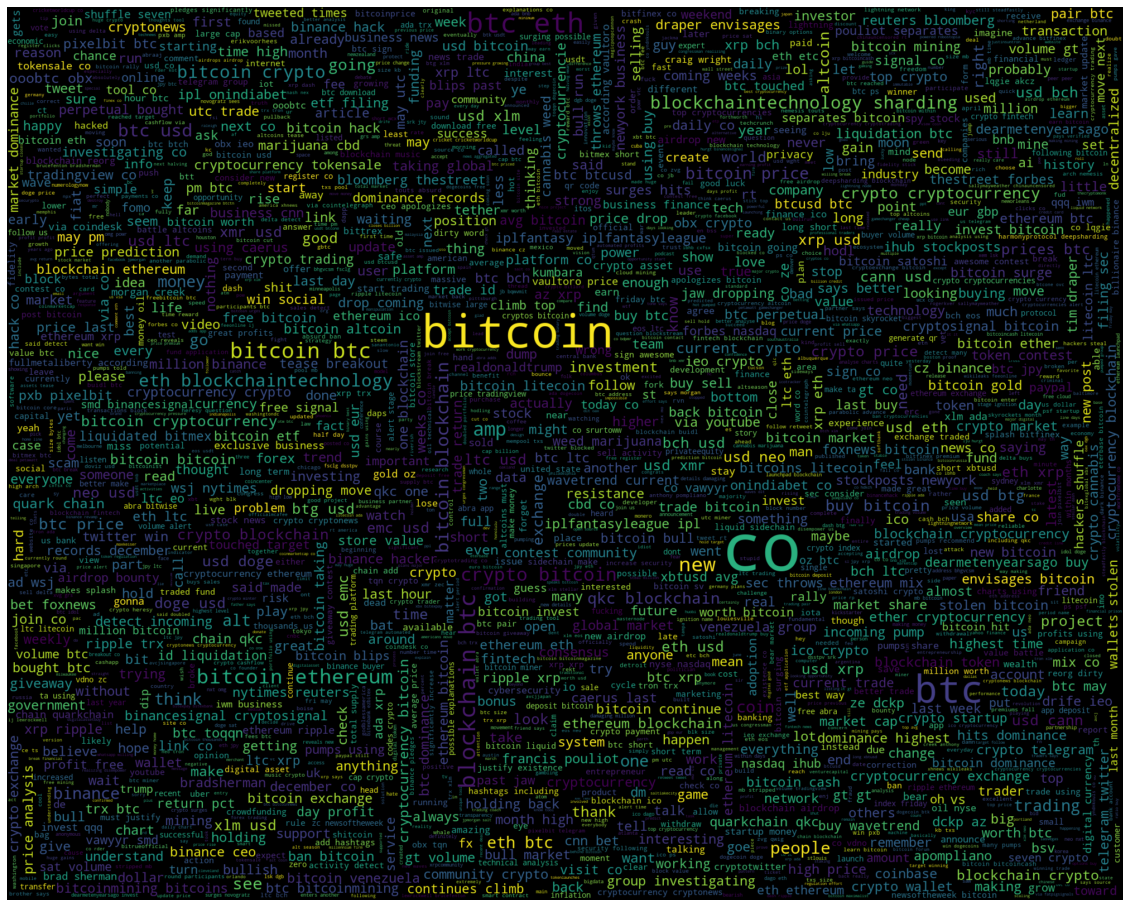

In [115]:
# all the words wordcloud
!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
allTheWords=" ".join( [twts for twts in df_j['text']])
wordCloud =WordCloud(max_words = 2000,width = 2000, height = 1600 , random_state = 21, max_font_size = 119).generate(allTheWords)
plt.imshow(wordCloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [114]:
len(allTheWords)

1682666

In [105]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from textblob import TextBlob

def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


df_j['polarity'] = df_j['text'].apply(lambda txt: getPolarity(txt))      # new column of sentiment
df_j['Subjectivity'] = df_j['text'].apply(lambda txt: getSubjectivity(txt))  

df_j.sample(10)

,id,user,fullname,url,timestamp,replies,likes,retweets,text,lang,Date_Time,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity
12830,1126869449255137281,kingdom_bitcoin,Bitcoin kingdom,NaN,2019-05-10 13:19:47+00,0,0,0,core drife essentially decentralized return po...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.150000
5386,1126835066208829443,WHarpy011,しんちゃん,NaN,2019-05-10 11:03:10+00,0,0,0,btc btc airdrop co qcxlf zne,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.000000
725,1132979857489584128,LoremCrypto,LoremCrypto,NaN,2019-05-27 12:00:22+00,0,0,0,litecoin ico zero knowledge proof miner full n...,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.35,0.550000
12236,1126866690925580288,MarketHedgeFund,💲💸🌿🍃😤💲 StockMarket HedgeFund 💲😤🍃🌿💸💲,NaN,2019-05-10 13:08:49+00,0,0,0,digaf mgti btcs btcsd ostk btc bch xrp stocks ...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.000000
14693,1126878145120837632,twftter5037,村田四郎,NaN,2019-05-10 13:54:20+00,0,0,0,get free bitcoin co ftuyfhyvzg,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.40,0.800000
1393,1132981951760130049,jmm77585,katrine ma,NaN,2019-05-27 12:08:41+00,0,0,0,ico dago eth btc greenminig,en,2019-05-27,BTC,2019-05-27,8800.346606,8653.151802,8937.246491,8621.572192,0.00,0.000000
3500,1126826831389306880,80bEAu08,฿eau,NaN,2019-05-10 10:30:26+00,0,0,0,thecryptomonk btc discount season establish k ...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.000000
12396,1126867474987847681,Crypto_Joe10,CryptoJoe,NaN,2019-05-10 13:11:56+00,0,0,0,york bitcoin,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.000000
3497,1126826697817501696,fibonaccicap,Omega Capital 🔮🌌,NaN,2019-05-10 10:29:54+00,0,0,0,cryptogainz would nuke one wants sell lower ri...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.10,0.300000
9137,1126851912475860992,inputspike,Inputspike,NaN,2019-05-10 12:10:06+00,0,0,0,btc dnt bittrex gained last min usd dnt distri...,en,2019-05-10,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,0.00,0.066667


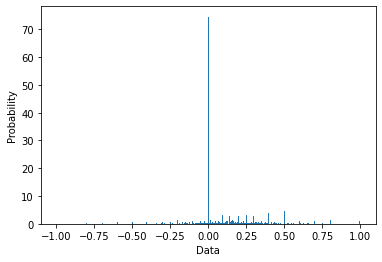

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['polarity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');


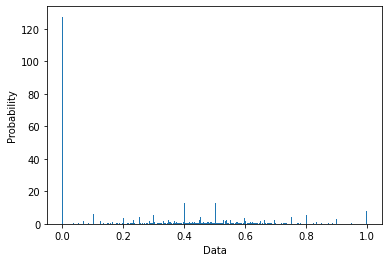

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(df_j['Subjectivity'], density=True, bins=300)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');



In [ ]:

# Bucket the score 

def getAnalysis(Score):
  if Score < 0 :
    return "Negative"
  elif Score >0:
    return "Positive"
  else:
     return "Neutral"

df_j["polarity_bkt "] = df_j["polarity"].apply(getAnalysis)


In [ ]:
Index(['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes',
       'retweets', 'text', 'lang', 'Date_Time', 'Currency', 'Date',
       'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)', 'polarity', 'Subjectivity', 'polarity_bkt '],
      dtype='object')

Index(['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes',
       'retweets', 'text', 'lang', 'Date_Time', 'Currency', 'Date',
       'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)', 'polarity', 'Subjectivity', 'polarity_bkt '],
      dtype='object')

In [ ]:
df_j["PercentageChange"]= (df_j['Closing Price (USD)']- df_j['24h Open (USD)'] )*100/df_j['24h Open (USD)'] 

df1 = df_j.groupby(["Date"]).sum()
df2 = df_j.groupby(["Date"]).mean()
df3.head()


df_k = df_j.groupby('Date', as_index=False).agg(Sum1=('Missed','sum'), 
                                            Sum2= ('Credit','sum'),
                                            Average=('Grade','mean'))


,id,replies,likes,retweets,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),polarity,Subjectivity,PercentageChange
Date,,,,,,,,,,,
2017-01-27,8.250705e+17,19.0,267.0,155.0,912.84375,901.05000,919.13250,896.28250,0.00,0.303571,1.308890
2017-09-08,9.061817e+17,3.0,5.0,3.0,4628.60250,4543.10250,4691.97999,4506.66250,0.35,0.350000,1.881974
2017-09-14,9.083219e+17,19.0,1248.0,434.0,3817.05750,3944.58375,4053.32250,3766.36000,0.25,0.500000,-3.232946
2017-11-28,9.354113e+17,12.0,509.0,238.0,9713.09625,9573.96750,9743.12375,9382.13125,0.20,0.644444,1.453198
2018-01-08,9.503921e+17,2.0,42.0,7.0,15632.41125,16735.10625,16861.20875,15546.41500,0.00,0.000000,-6.589113


In [ ]:
import statistics
count = df_imdb['text'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count[]

35

In [ ]:
from numpy.random import RandomState

rng = RandomState()
train_data = df_imdb.sample(frac=0.8, random_state=rng)
test_data = df_imdb.loc[~df_imdb.index.isin(train_data.index)]

In [ ]:
max_features = 20000  # Only consider the top 20k words
maxlen = 160

In [ ]:
train_data['flag'] = 'TRAIN'
test_data['flag'] = 'TEST'


total_docs = pd.concat([train_data,test_data],axis = 0,ignore_index = True)
phrases = total_docs['text'].tolist()

total_docs.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,label,lang,len,flag
5789,beguiled one favorite clint eastwood films dep...,1,en,39999,TRAIN
23876,williams family live ranch located middle remo...,1,en,39999,TRAIN
2082,brokedown palace story two best friends alice ...,1,en,39999,TRAIN
8443,comic modesty strong alexandra staden plays mo...,0,en,39999,TRAIN
36377,movie misunderstood even funny think seeing on...,1,en,39999,TEST
9814,really wanted good liverpool set truly awful a...,0,en,39999,TRAIN
2440,people talk horrible script horrible animation...,1,en,39999,TRAIN
36910,badly made dreadful acting ending director app...,0,en,39999,TEST
10026,saw movie today say much much better expected ...,1,en,39999,TRAIN
18471,last week watched royal shakespeare company pr...,0,en,39999,TRAIN


In [ ]:
total_docs["PercentageChange"]= (total_docs['Closing Price (USD)']- total_docs['24h Open (USD)'] )/total_docs['24h Open (USD)'] 

#df1 = total_docs.groupby(["Date"]).sum()
#df2 = total_docs.groupby(["Date"]).mean()
#df3.head()
# Bucket the score 

def getAnalysis(Score):
  if Score <= -0.5 :
    return "High Negative"
  elif Score >= 0.5:
    return "High Positive"
  else:
     return "Neutral"

total_docs["polarity_bkt "] = total_docs["PercentageChange"].apply(getAnalysis)

df_k = df_j.groupby('Date', as_index=False).agg(Sum1=('Missed','sum'), 
                                            Sum2= ('Credit','sum'),
                                            Average=('Grade','mean'))

In [98]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_len = 500
tok = Tokenizer(num_words=20000)
tok.fit_on_texts(phrases)
sequences = tok.texts_to_sequences(phrases)
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
x_train, x_val, y_train, y_val = train_test_split(sequences_matrix, total_docs['label'], test_size=0.3, random_state=2)

In [103]:
len(y_train)

27999

In [ ]:
#from keras.preprocessing.text import one_hot
#vocab_size = 50000
#encoded_phrases = [one_hot(d, vocab_size) for d in phrases]
#total_docs['Phrase'] = encoded_phrases
#train_data = total_docs[total_docs['flag'] == 'TRAIN']
#test_data = total_docs[total_docs['flag'] == 'TEST']
#x_train = train_data['Phrase']
#y_train = train_data['label']
#x_val = test_data['Phrase']
#y_val = test_data['label']

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [116]:
model = Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")


# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 32))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(128))

# Add a classifier
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         82432     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=8, 
          validation_data=(x_val, y_val),
          validation_steps=20)

Epoch 1/8
 42/219 [====>.........................] - ETA: 15:57 - loss: 0.7375 - accuracy: 0.5295

In [51]:
test_loss, test_acc = model.evaluate(x=x_val, y=y_val)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

sample_text = ('Bitcoin just lost half its value overnight. Sorry all you savvy investors ')
vocab_size = 50000

model.predict(one_hot(sample_text, vocab_size))

250/250 [==============================] - 37s 144ms/step - loss: 0.9932 - accuracy: 0.8596
Test Loss: 0.9931923151016235
Test Accuracy: 0.859624981880188


array([[0.9733474 ],
       [0.48472294],
       [0.22391623],
       [0.55815285],
       [0.12833652],
       [0.03684947],
       [0.7224936 ],
       [0.01876104],
       [0.55591375],
       [0.31367177],
       [0.07428402],
       [0.06918979]], dtype=float32)

In [52]:
model.save("model_imdb_Store")

INFO:tensorflow:Assets written to: model_imdb_Store/assets


INFO:tensorflow:Assets written to: model_imdb_Store/assets


In [84]:
import numpy as np
result = model.predict(one_hot("this is happen", vocab_size), steps = 10)
print(result)
preds = model.predict(x_val)

n = np.random.randint(0,9999)

x_val[n]

if preds[n] > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (y_val[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

[[0.3421505 ]
 [0.44077656]
 [0.3964479 ]]
predicted sentiment : positive


KeyError: ignored

In [82]:

y_val= y_val.drop("index", axis=1)

In [80]:
x_fim = y_val

In [85]:
preds[n]

array([0.99986386], dtype=float32)

In [87]:
def add_score_predictions(data, reviews_list_idx):

  data['sentiment score'] = 0

  reviews_list_idx = pad_sequences(reviews_list_idx, maxlen=maxLen, padding='post')

  review_preds = model.predict(reviews_list_idx)

  data['sentiment score'] = review_preds

  pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',review_preds)))

  data['predicted sentiment'] = 0

  data['predicted sentiment'] = pred_sentiment

  return data

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 42181, 29862, 46332,   391, 48905, 14003,  6517, 42484,
       47895, 36524, 39308, 41530, 44933, 13568, 17246, 22092, 35964,
       32393, 34835, 34835,   391, 26320, 30286, 32841, 15078, 35540,
        9201, 39308, 34835, 34835, 22621, 26320, 32153, 40823, 24356,
       28378, 48928, 42774, 23546, 46332, 39944,  9912,  6864, 31347,
       25489, 44490, 30476, 26320, 43768, 33978, 42564, 28152, 10178,
        5690, 11656,  6358, 33517, 36516, 33829, 14379, 25117, 13555,
       37628, 34396, 20999, 17246, 36907, 34835, 34835, 11353, 10957,
       39306, 17325, 19765, 19535,   391,  4217, 32645, 17886, 12006,
       29891, 26169, 11992, 33891, 13369,   391, 49176, 33761,  5842,
        3185,   391,  7318, 29001,  2785, 35540, 33895, 28378, 13774,
       40008, 24918, 34565, 15441, 14876, 42564, 45422, 49170, 47522,
       12842, 42523, 10509, 16655, 44786, 37712, 28164, 47895, 43746,
       28322, 38621,

In [88]:
n

7678

In [89]:
preds

array([[2.6098351e-05],
       [3.5236757e-05],
       [9.9880230e-01],
       ...,
       [9.9996471e-01],
       [5.1233470e-03],
       [9.9995565e-01]], dtype=float32)